In [16]:
!ls ./data/TvW/wolves -1 | wc -l 

999


In [17]:
!ls ./data/TvW/tigers -1 | wc -l 

2762


# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# animal categories
path = './data/TvW/'
categories = ['tigers','wolves']


Using TensorFlow backend.


# Display some images 

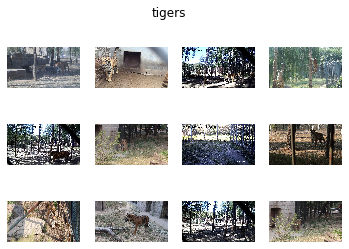

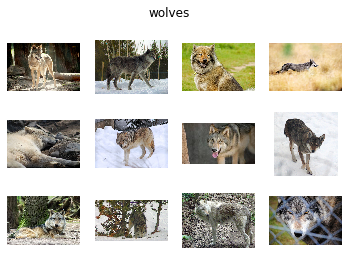

In [2]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

# Picture Shape

In [3]:
!rm -rf ./data/TvW/tigers/.ipynb_checkpoints
!rm -rf ./data/TvW/wolves/.ipynb_checkpoints

# Preprocess data and label input

In [4]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 55
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['./data/TvW/tigers/3180.jpg', 0], ['./data/TvW/tigers/1671.jpg', 0], ['./data/TvW/tigers/3003.jpg', 0], ['./data/TvW/tigers/3903.jpg', 0], ['./data/TvW/tigers/1909.jpg', 0], ['./data/TvW/tigers/1352.jpg', 0], ['./data/TvW/tigers/1109.jpg', 0], ['./data/TvW/tigers/2276.jpg', 0], ['./data/TvW/tigers/2864.jpg', 0], ['./data/TvW/tigers/0046.jpg', 0]]


In [5]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)


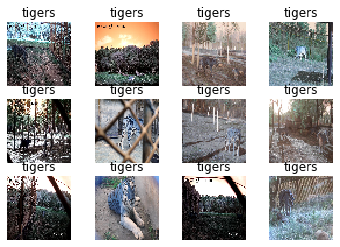

In [6]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()


# Split dataset into train and test set

In [7]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
# Preprocess class labels
#trainY = np_utils.to_categorical(trainY, 2)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(3008, 55, 55, 3)
(753, 55, 55, 3)
(3008,)
(753,)


# Define model architecture

In [9]:

from keras.models import load_model
from keras.optimizers import Adam
from keras.models import Sequential
from keras import layers
from keras.models import Model
#model = load_model('CvD.h5')

N_CHANNELS = 3
img_width = 55
img_height = 55

# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), input_shape=(img_height , img_width, N_CHANNELS)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(32, (3, 3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(64, (3, 3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(64))
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1))
# model.add(layers.Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.summary()


In [10]:
# from tensorflow import set_random_seed
# set_random_seed(2)
from sklearn.metrics import confusion_matrix, accuracy_score

# VGG16

In [11]:
acc = []
for i in range(10):   
    from keras.applications.vgg16 import VGG16
    base_model = VGG16(input_shape=(img_height , img_width, N_CHANNELS), weights=None, include_top=False)
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    output = layers.Activation('sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)
    # from numpy import argmax
    # from sklearn.metrics import confusion_matrix, accuracy_score

    pred = model.predict(testX)
    predictions = np.round(pred) # return to label
    accuracy = accuracy_score(testY, predictions)
    print("Accuracy : %.2f%%" % (accuracy*100.0))
    acc.append(accuracy)
    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Accuracy : 42.76%
Accuracy : 26.56%
Accuracy : 73.44%
Accuracy : 26.56%
Accuracy : 73.44%
Accuracy : 26.56%
Accuracy : 26.56%
Accuracy : 26.56%
Accuracy : 73.44%
Accuracy : 40.11%


In [12]:
print(acc)
ave_acc = np.mean(acc)*100
n = len(acc)
ci = 1.96* np.sqrt((ave_acc*(100-ave_acc))/n)
print("Average Accuracy is %.2f%% +/-  %.2f%% " % (ave_acc , ci) )

[0.42762284196547146, 0.2656042496679947, 0.7343957503320053, 0.2656042496679947, 0.7343957503320053, 0.2656042496679947, 0.2656042496679947, 0.2656042496679947, 0.7343957503320053, 0.40106241699867196]
Average Accuracy is 43.60% +/-  30.74% 


# VGG19

In [13]:
acc = []
for i in range(10):  
    from keras.applications.vgg19 import VGG19
    base_model = VGG19(input_shape=(img_height , img_width, N_CHANNELS), weights=None, include_top=False)
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    output = layers.Activation('sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)
    # from numpy import argmax
    # from sklearn.metrics import confusion_matrix, accuracy_score

    pred = model.predict(testX)
    predictions = np.round(pred) # return to label
    accuracy = accuracy_score(testY, predictions)
    print("Accuracy : %.2f%%" % (accuracy*100.0))
    acc.append(accuracy)
print(acc)
ave_acc = np.mean(acc)*100
n = len(acc)
ci = 1.96* np.sqrt((ave_acc*(100-ave_acc))/n)
print("Average Accuracy is %.2f%% +/-  %.2f%% " % (ave_acc , ci) )

Accuracy : 73.57%
Accuracy : 38.38%
Accuracy : 26.03%
Accuracy : 73.04%
Accuracy : 40.64%
Accuracy : 26.56%
Accuracy : 26.56%
Accuracy : 73.44%
Accuracy : 26.56%
Accuracy : 73.44%
[0.7357237715803453, 0.3837981407702523, 0.2602921646746348, 0.7304116865869854, 0.4063745019920319, 0.2656042496679947, 0.2656042496679947, 0.7343957503320053, 0.2656042496679947, 0.7343957503320053]
Average Accuracy is 47.82% +/-  30.96% 


# ResNet101

In [14]:
acc = []
for i in range(10):  
    from keras.applications.resnet import ResNet101
    base_model = ResNet101(input_shape=(img_height , img_width, N_CHANNELS), weights=None, include_top=False)
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    output = layers.Activation('sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)
    # from numpy import argmax
    # from sklearn.metrics import confusion_matrix, accuracy_score

    pred = model.predict(testX)
    predictions = np.round(pred) # return to label
    accuracy = accuracy_score(testY, predictions)
    print("Accuracy : %.2f%%" % (accuracy*100.0))
    acc.append(accuracy)
print(acc)
ave_acc = np.mean(acc)*100
n = len(acc)
ci = 1.96* np.sqrt((ave_acc*(100-ave_acc))/n)
print("Average Accuracy is %.2f%% +/-  %.2f%% " % (ave_acc , ci) )

Accuracy : 60.42%
Accuracy : 26.69%
Accuracy : 63.88%
Accuracy : 26.56%
Accuracy : 26.56%
Accuracy : 28.02%
Accuracy : 26.56%
Accuracy : 73.44%
Accuracy : 26.56%
Accuracy : 26.29%
[0.6042496679946879, 0.26693227091633465, 0.6387782204515272, 0.2656042496679947, 0.2656042496679947, 0.28021248339973437, 0.2656042496679947, 0.7343957503320053, 0.2656042496679947, 0.26294820717131473]
Average Accuracy is 38.50% +/-  30.16% 


# DenseNet121

In [15]:
acc = []
for i in range(10):  
    from keras.applications.densenet import DenseNet121
    base_model = DenseNet121(input_shape=(img_height , img_width, N_CHANNELS), weights=None, include_top=False)
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    output = layers.Activation('sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)
    # from numpy import argmax
    # from sklearn.metrics import confusion_matrix, accuracy_score

    pred = model.predict(testX)
    predictions = np.round(pred) # return to label
    accuracy = accuracy_score(testY, predictions)
    print("Accuracy : %.2f%%" % (accuracy*100.0))
    acc.append(accuracy)
print(acc)
ave_acc = np.mean(acc)*100
n = len(acc)
ci = 1.96* np.sqrt((ave_acc*(100-ave_acc))/n)
print("Average Accuracy is %.2f%% +/-  %.2f%% " % (ave_acc , ci) )


Accuracy : 73.44%
Accuracy : 26.56%
Accuracy : 73.44%
Accuracy : 64.01%
Accuracy : 44.49%
Accuracy : 25.10%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 67.73%
Accuracy : 26.56%
[0.7343957503320053, 0.2656042496679947, 0.7343957503320053, 0.6401062416998672, 0.4448871181938911, 0.250996015936255, 0.7343957503320053, 0.7343957503320053, 0.6772908366533864, 0.2656042496679947]
Average Accuracy is 54.82% +/-  30.85% 


# MobileNet

In [16]:
acc = []
for i in range(10):  
    from keras.applications.mobilenet import MobileNet
    base_model = MobileNet(input_shape=(img_height , img_width, N_CHANNELS), weights=None, include_top=False)
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    output = layers.Activation('sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)
    # from numpy import argmax
    # from sklearn.metrics import confusion_matrix, accuracy_score

    pred = model.predict(testX)
    predictions = np.round(pred) # return to label
    accuracy = accuracy_score(testY, predictions)
    print("Accuracy : %.2f%%" % (accuracy*100.0))
    acc.append(accuracy)
print(acc)
ave_acc = np.mean(acc)*100
n = len(acc)
ci = 1.96* np.sqrt((ave_acc*(100-ave_acc))/n)
print("Average Accuracy is %.2f%% +/-  %.2f%% " % (ave_acc , ci) )

Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
Accuracy : 73.44%
[0.7343957503320053, 0.7343957503320053, 0.7343957503320053, 0.7343957503320053, 0.7343957503320053, 0.7343957503320053, 0.7343957503320053, 0.7343957503320053, 0.7343957503320053, 0.7343957503320053]
Average Accuracy is 73.44% +/-  27.37% 


# Fit model on training data

In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

In [ ]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)


# Evaluate model on test data

In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = np.round(pred) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

# Save Model

In [ ]:
model.save("TvW.h5")